In [47]:
%matplotlib notebook 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json #to see data structures
import datetime #convert unix timestamps to str

## Data cleaning
### Travail en amont : 
### separer les categories par un retour a la ligne 
### attention: ne pas laisser de ligne VIDE . 

In [48]:
long_format = open('modified.txt', 'r').read()  # getting requested data from literate.
size_long = len(long_format)
counter = 0
name = long_format

resources = ["bid", "ask", "oct95_lbp","oct98_lbp", "diesel_lbp", "gas_lbp", "brentcrude_usd", "omt", "sayrafa"]  # categories in order
index = ''
value = ''
category = ''
prices = {}  # this will be our dictionary
rupture_index_value = 0  # binary that signals the rupture between index and value
for i in range(size_long):
    if ord(name[i]) == 10:  # ASCII 10 corresponds to char: new line
        if counter < len(resources):
            category = resources[counter]  # at each space in the dataset, we are concerned with a new category of prices
            counter += 1  # increasing counter at each new line char
    if (48 <= ord(name[i]) <= 57):   #chiffre 
        if rupture_index_value == 0:
            index += name[i]
        else:
            value += name[i]

    if (ord(name[i]) < 48) or (ord(name[i]) > 57):  # checking if the char is not a digit
        rupture_index_value = (rupture_index_value + 1) % 2  # to get a binary number
        if rupture_index_value == 0:  # when rupture_index_value = 0 then we have already completed both index and value and we can proceed by adding to dict
            if category not in prices:
                prices[category] = {}
            if index != '' and value != '':  # added check to ensure index and value are not empty
                prices[category][int(index)] = float(value)
            index = ''
            value = ''
 


In [49]:
for i in prices:
    print("this is :" + i)
json.dumps(prices);

this is :
this is :bid
this is :ask
this is :oct95_lbp
this is :oct98_lbp
this is :diesel_lbp
this is :gas_lbp
this is :brentcrude_usd
this is :omt
this is :sayrafa


In [60]:
print(prices["oct95_lbp"])


{}


# Attention!!! modifier le dict . Premier element est vide 

NOTE: MY DICTIONARY IS A NESTED DICTIONARY : 
with prices.keys = bid ask ...
prices.value = timeid : price
prices["bid for example"].keys = timeids




##### NOTE: the time_ids are unix timestamps 
##### lets's convert them 


In [34]:
spread = []
date = []
for time_id in prices["bid"]: #equivalent to prices["bid"].keys()
    if time_id in prices["ask"]:
        spread.append(prices["bid"][time_id] - prices["ask"][time_id])     
        date.append(datetime.datetime.fromtimestamp(time_id // 1000).strftime('%Y-%m-%d %H:%M:%S'))
 


In [35]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
fig.add_trace(go.Scatter(
    x=date,
    y=spread,
    mode='lines',
    name='Value'
))

# Set x-axis type to 'date' for proper date formatting
fig.update_xaxes(type='date')

# Add hover tooltips with custom formatting
fig.update_traces(hovertemplate='Date: %{x}<br>Value: %{y}')

# Add zoom and pan functionality
fig.update_xaxes(rangeslider_visible=True)

# Display the chart
fig.show()


In [23]:
array_spread = np.array(spread)
np.sum(array_spread)/len(array_spread) - np.mean(array_spread)
np.median(array_spread) 
np.min(array_spread)


15.0

<IPython.core.display.Javascript object>


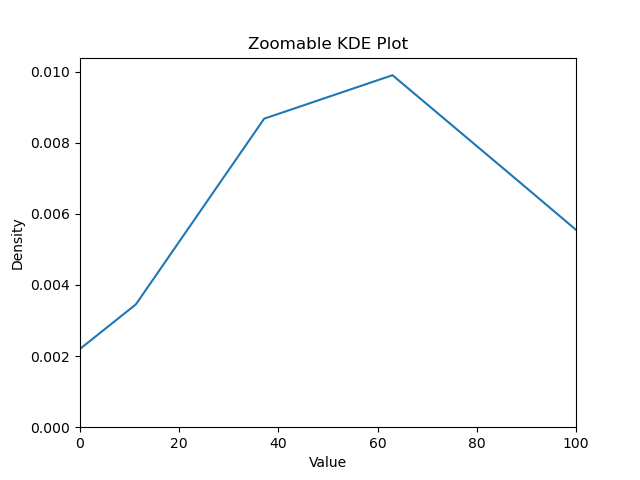